# Exploratory Plotting in R

### This tutorial will use several R packages, including ggplot2 - a powerful and flexible package for produing graphics. 

In [56]:
# Installation
install.packages(c('ggplot2', 'dplyr', 'tidyr','psych', 'grid', 'gridExtra'))

# Loading
library(ggplot2)
library(dplyr)
library(tidyr)
library(psych)
library(grid)
library(gridExtra)

Installing packages into ‘/Users/tuk44481/Library/R/3.6/library’
(as ‘lib’ is unspecified)
Warning message:
“package ‘grid’ is not available (for R version 3.6.0)”Warning message:
“package ‘grid’ is a base package, and should not be updated”also installing the dependency ‘rlang’

Warning message in install.packages(c("ggplot2", "dplyr", "tidyr", "psych", "grid", :
“installation of package ‘rlang’ had non-zero exit status”Warning message in install.packages(c("ggplot2", "dplyr", "tidyr", "psych", "grid", :
“installation of package ‘dplyr’ had non-zero exit status”Warning message in install.packages(c("ggplot2", "dplyr", "tidyr", "psych", "grid", :
“installation of package ‘tidyr’ had non-zero exit status”

### ggplot2 has three fundamental components: data, aesthetics (x and y variables, grouping variables), and type of graphics.

In [11]:
# ggplot (data =, aes (x = , y = , fill = , shape =, color =) +
#    geom_histogram ()

# data = name of data frame
# x = name of x axis variable
# y = name of y axis variable
# fill = group by fill color (for use with histograms, bar plots, box plots)
# shape = group by shape (for use with scatter plots)
# color = group by color (for use with scatter plots)

### The tutorial will explore a data set by plotting histograms (geom_histogram), density plots (geom_density), scatter plots (geom_point), and bar plots (geom_bar). 

#### For a more complete list of ggplot2 graphics (and functionalities), see http://www.sthda.com/english/wiki/ggplot2-essentials

In [12]:
# The tutorial data set comes from a study examining vulnerability to decision bias 
# in expert geoscientists. Vulnerability to several biases was assessed using 
# descriptive geologic decision scenarios. Here, we are interested in determining
# whether expert geoscientists show susceptibility to hindsight bias, and whether
# experts' years of experience influences susceptiblity to hindsight.


# Import dataset
# Name of data frame <- read.csv("Name of file.csv")
  RData <- read.csv("Tutorial Data.csv")

# To be considered experts, participants had to complete an undergraduate degree in 
# a geology-related field.

# Filter out participants who did not meet degree requirement
# Name of data frame <- filter (Name of data frame, Filtering variable logic)
  RData <- filter (RData, YearsExp > 0)

### To begin, generate plots that characterize the sample.

#### Histogram

Warning message:
“Removed 2 rows containing missing values (geom_bar).”

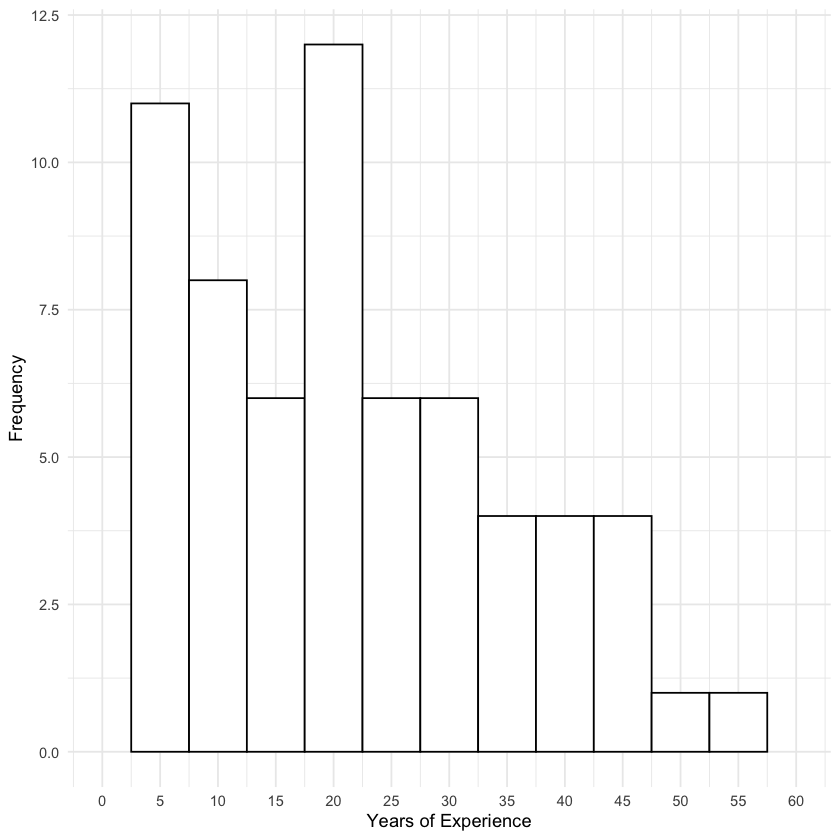

In [13]:
# What is the distribution of years of experience? 
  
  print ( ##Note the print command is only neccessary to generate plots in Jupyter
  
  ggplot(RData, aes(x=YearsExp)) + ##We don't have to specify a y-axis variable for histograms, the default is count.
    geom_histogram(color="black", fill="white", ##color changes outline, fill changes interior 
                   binwidth=5) +  
    scale_x_continuous (name = "Years of Experience", ##sets axis title
                        breaks = seq(0, 60, 5), limits=c(0, 60)) + ##sets major breaks and axis limits
    scale_y_continuous(name = "Frequency") +
    theme_minimal() 
  
  )

# For complete list of ggplot2 colors, see http://sape.inf.usi.ch/quick-reference/ggplot2/colour

#### Bar plot

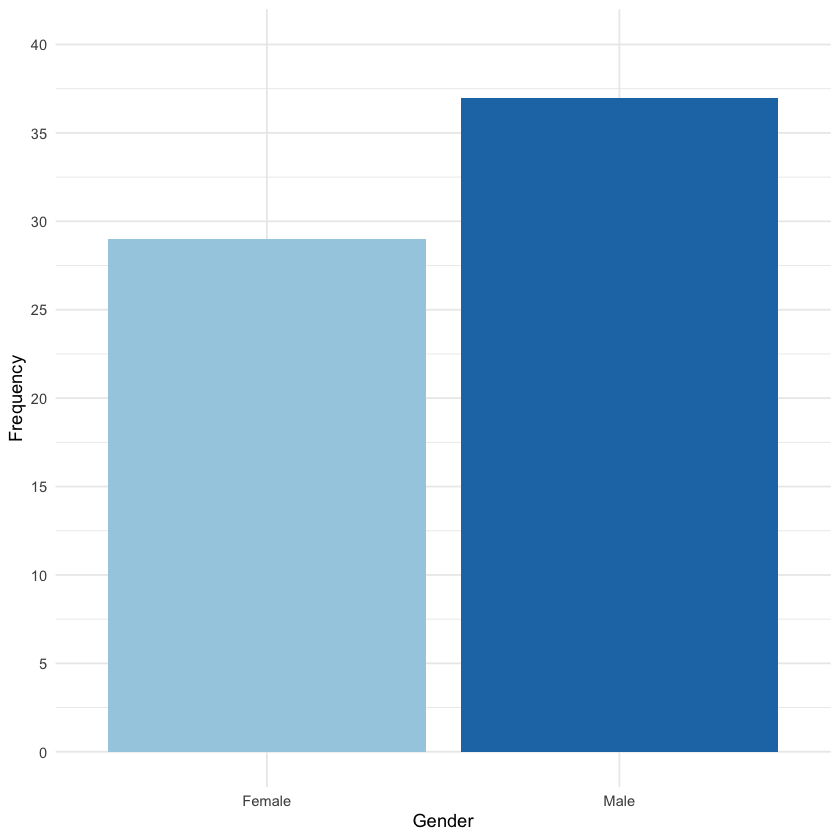

In [26]:
# How many males versus females are in the sample? 
  
  print (
      
  ggplot(RData, aes (x=Gender, y=..count.., fill=Gender)) + ##fill must be defined by one of scale_fill functions
    geom_bar(position = position_dodge()) +
    scale_x_discrete (name = "Gender") +
    scale_y_continuous(name = "Frequency", breaks = seq(0, 40, 5), limits=c(0, 40)) +
    theme_minimal() +
    theme(legend.position = "none") + ##this gets rid of legend that is automatically created by setting fill variable
    scale_fill_brewer(palette = "Paired")  ##uses color palettes to assign different fill colors to grouping variables
  )

# For complete list of brewer palette's, see http://www.sthda.com/sthda/RDoc/images/rcolorbrewer.png

# For more information about using color palette's in r, 
# see http://www.sthda.com/english/wiki/ggplot2-colors-how-to-change-colors-automatically-and-manually

#### Scatter plot

Warning message:
“Removed 1 rows containing missing values (geom_point).”

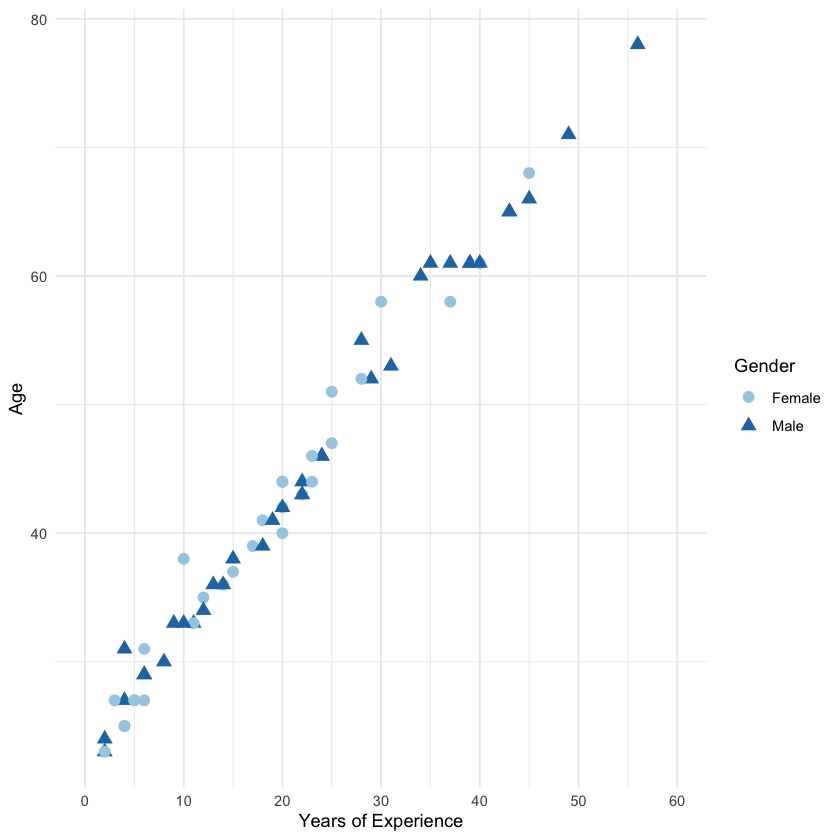

In [27]:
# What is the relationship between years of experience, gender, and participant's age?

  print (
  
  ggplot(RData, aes(x=YearsExp, y=Age, shape=Gender, color=Gender)) +
    geom_point(size=3) +
    scale_x_continuous (name = "Years of Experience", breaks = seq(0, 60, 10), limits=c(0, 60)) +
    theme_minimal() +
    scale_color_brewer(palette = "Paired") 
      
  )

### Now, generate plots to assess susceptibility to hindsight bias

#### Bar plot (with error bars and raw data overlays)

Installing package into ‘/Users/tuk44481/Library/R/3.6/library’
(as ‘lib’ is unspecified)
Warning message:
“Removed 4 rows containing missing values (geom_point).”

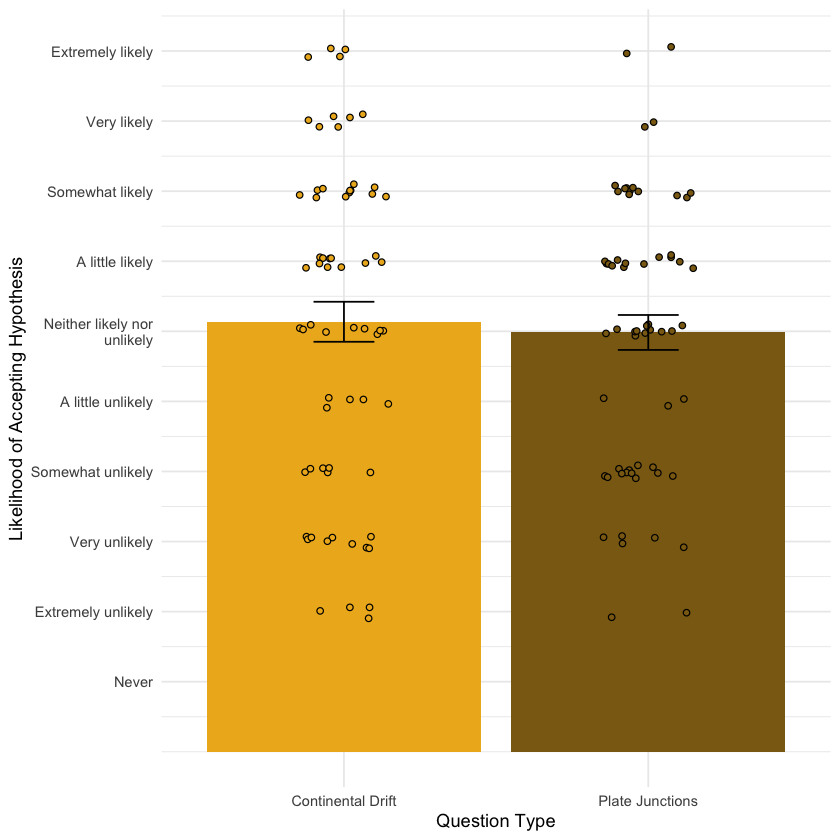

In [82]:
# Hindsight bias was assessed by asking geoscientists to rate their likelihood of accepting hypotheses 
# about plate junctions and continental drift at the time of their introduction in the early 1900s.
# Note that while both hypotheses are now well-accepted, they were historically controversial when proposed 
# and ignored or ridiculed by a majority of the U.S. geology community. 

# Participants should rate themselves as extremely unlikely to accept either hypothesis, those who report an
# increased likelihood are showing hindsight bias


# To generate a plot with error bars, we need to load the summarySE function
# summarySE provides the standard deviation, standard error of the mean, and a (default 95%) confidence interval
  summarySE <- function(data=NULL, measurevar, groupvars=NULL, na.rm=TRUE, conf.interval=.95) {
    install.packages ('doBy')
    library(doBy)
    
    # New version of length which can handle NA's: if na.rm==T, don't count them
    length2 <- function (x, na.rm=FALSE) {
      if (na.rm) sum(!is.na(x))
      else       length(x)
    }
    
    # Collapse the data
    formula <- as.formula(paste(measurevar, paste(groupvars, collapse=" + "), sep=" ~ "))
    datac <- summaryBy(formula, data=data, FUN=c(length2,mean,sd), na.rm=na.rm)
    
    # Rename columns
    names(datac)[ names(datac) == paste(measurevar, ".mean",    sep="") ] <- measurevar
    names(datac)[ names(datac) == paste(measurevar, ".sd",      sep="") ] <- "sd"
    names(datac)[ names(datac) == paste(measurevar, ".length2", sep="") ] <- "N"
    
    datac$se <- datac$sd / sqrt(datac$N)  # Calculate standard error of the mean
    
    # Confidence interval multiplier for standard error
    # Calculate t-statistic for confidence interval: 
    # e.g., if conf.interval is .95, use .975 (above/below), and use df=N-1
    ciMult <- qt(conf.interval/2 + .5, datac$N-1)
    datac$ci <- datac$se * ciMult
    
    return(datac)
  }


# We also need to transform the data. Currently, responses to the plate junctions (PJself) and continental drift 
# (CDself) are in separate columns, we need to create a new transformed data frame where these columns are 
# combined (QResp) and a new grouping variable (QType) is created.

  tempvalues <- c("Subject", "PJself", "CDself", "Age", "Gender", "YearsExp") ##variables to bring to new data frame
  tempdata <- RData[tempvalues] ##new data frame with selected variables
  RData.long <- gather(tempdata, QType, QResp, -Subject, -Age, -Gender, -YearsExp) ##new transformed data frame


# Now we are ready to generate the barplot, since this is exploratory plotting we will overlay raw data points
# Call summarySE to compute information for error bars
  summarystats <- summarySE(RData.long, measurevar="QResp", groupvars="QType")

  print (

  ggplot(summarystats, aes (x=QType, y=QResp, fill=QType)) + ##note the data here comes from summarySE call above
    geom_bar(stat="identity", position = position_dodge()) + ##this code is needed to align error bars properly
    geom_point(data=RData.long, aes (x=QType, y=QResp), shape = 21, ##this code provides data overlay, for additional shape codes, see http://www.sthda.com/sthda/RDoc/images/points-symbols.png
               position = position_jitterdodge(jitter.width = 0.3, jitter.height = 0.1, dodge.width = 0.9)) + ##this jitters data so points don't fall ontop of one another
    geom_errorbar(aes(ymin=QResp-se, ymax=QResp+se), width=.2, position = position_dodge(.9)) + ##this code sets error bar to +/- 1 standard error (se)
    scale_x_discrete (name = "Question Type", breaks=(c("CDself", "PJself")), 
                      labels = (c("Continental Drift", "Plate Junctions"))) + ##breaks and labels allow you to rename axis labels without changing data frame
    scale_y_continuous(name = "Likelihood of Accepting Hypothesis", 
                       breaks=(c(1,2,3,4,5,6,7,8,9,10,11,12)), 
                       labels=(c("Never", "Extremely unlikely", "Very unlikely", "Somewhat unlikely", 
                                 "A little unlikely","Neither likely nor\nunlikely", "A little likely", 
                                 "Somewhat likely", "Very likely", "Extremely likely", "Always", 
                                 "I have no relevant\nexperience"))) +
    theme_minimal() +
    theme(legend.position = "none") +
    scale_fill_manual (values=c("goldenrod2","goldenrod4")) ##you can also specify colors manually, instead of using palettes
  
  )

#### Scatter plot (with fit line and correlation statistics)

Warning message:
“Removed 4 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 4 rows containing missing values (geom_point).”

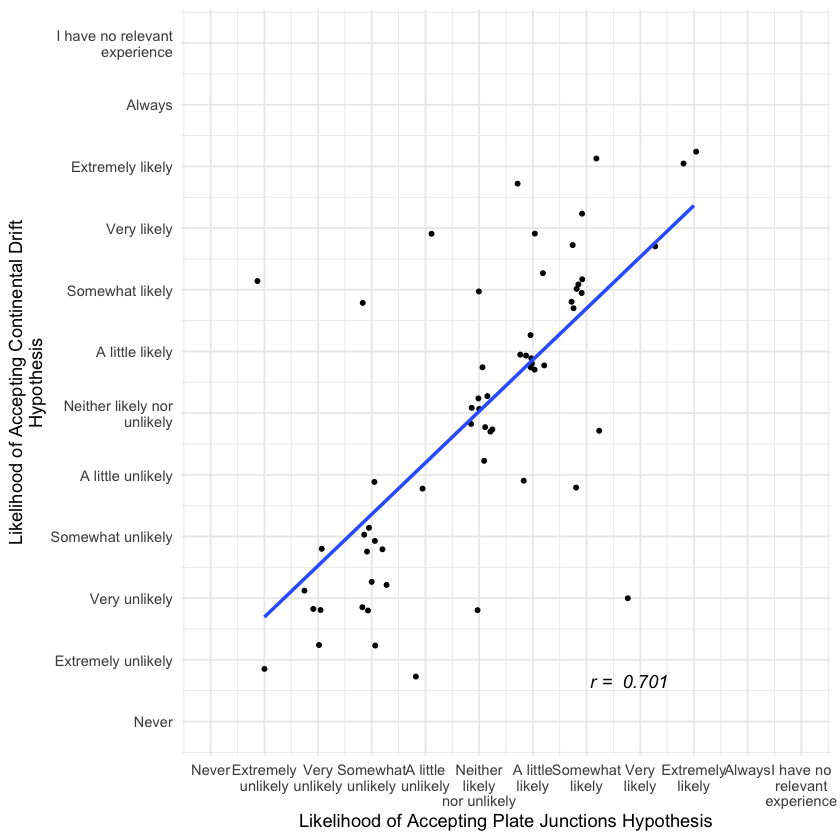

In [58]:
# Are estimates on the continental drift question correlated with estimates on the plate junctions question?
# Could the data be simplified by averaging estimates into single score?

# First we execute the correlation and format it for inclusion on the plot
  cor.grob = grobTree(textGrob(paste(
                     "r = ", round(cor(x=RData$PJself, y=RData$CDself, use="complete.obs", method="pearson"), 3) ), ##this code executes pearson correlation
                     x = 0.63, y = 0.1, hjust = 0, ##this code positions the r-value on the plot
                     gp = gpar(col = "black", fontsize = 11, fontface = "italic"))) ##this code formats the text

  print (
      
  ggplot(RData, aes(PJself, CDself)) +
    geom_point(size=1, position = position_jitter(w = 0.3, height = 0.3)) +
    geom_smooth (method= lm, se=FALSE, fullrange=FALSE, level=0.95) + ##lm fits linear model, another option is to fit a smooth local regression (loess)
    scale_x_continuous (name = "Likelihood of Accepting Plate Junctions Hypothesis", 
                        breaks=(c(1,2,3,4,5,6,7,8,9,10,11,12)), 
                        labels=(c("Never", "Extremely\nunlikely", "Very\nunlikely", "Somewhat\nunlikely", "A little\nunlikely",
                                 "Neither\nlikely\nnor unlikely", "A little\nlikely", "Somewhat\nlikely", "Very\nlikely", 
                                 "Extremely\nlikely", "Always", "I have no\nrelevant\nexperience")), 
                        limits=c(1, 12)) +
    scale_y_continuous(name = "Likelihood of Accepting Continental Drift\nHypothesis", 
                       breaks=(c(1,2,3,4,5,6,7,8,9,10,11,12)), 
                       labels=(c("Never", "Extremely unlikely", "Very unlikely", "Somewhat unlikely", "A little unlikely",
                                 "Neither likely nor\nunlikely", "A little likely", "Somewhat likely", "Very likely", 
                                 "Extremely likely", "Always", "I have no relevant\nexperience")), 
                       limits=c(1, 12)) +
    theme_minimal() +
    annotation_custom(cor.grob)
  
  )

### Finally, generate a plot to assess the impact of geoscientists' years of experience on susceptibility to hindsight bias

#### Multi-panel scatter and density plots

Warning message:
“Removed 4 rows containing non-finite values (stat_density).”Warning message:
“Removed 4 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 4 rows containing missing values (geom_point).”

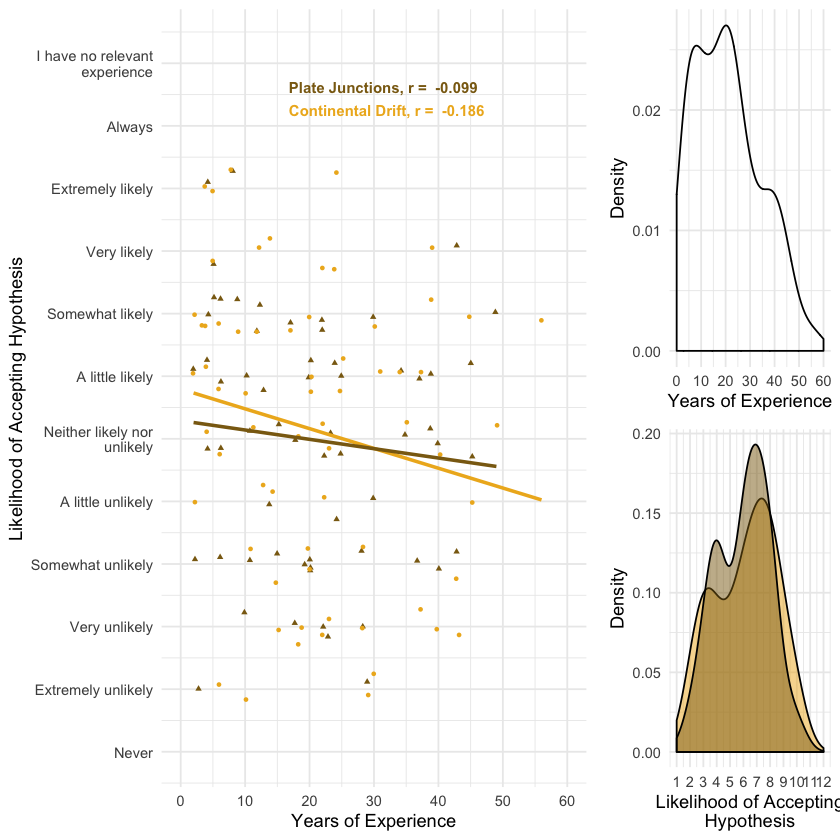

In [89]:
# Do years of experience impact susceptibility to hindsight on either question (plate junctions, continental drift)
# Does it make sense to run a regression?

# execute correlations for inclusion in scatterplot
  corPJ.grob = grobTree(textGrob(paste(
                     "Plate Junctions, r = ", round(cor(x=RData$PJself, y=RData$YearsExp, use="complete.obs", method="pearson"), 3) ),
                     x = 0.3, y = 0.9, hjust = 0, 
                     gp = gpar(col = "goldenrod4", fontsize = 9, fontface = "bold")))
  
  corCD.grob = grobTree(textGrob(paste(
                     "Continental Drift, r = ", round(cor(x=RData$CDself, y=RData$YearsExp, use="complete.obs", method="pearson"), 3) ),
                     x = 0.3, y = 0.87, hjust = 0, 
                     gp = gpar(col = "goldenrod2", fontsize = 9, fontface = "bold")))


# create scatter plot
  scatterplot <- ggplot(RData.long, aes(x=YearsExp, y=QResp, color=QType, shape=QType)) +
    geom_point(size=1, position = position_jitter(w = 0.3, height = 0.3)) +
    geom_smooth (method= lm, se=FALSE, fullrange=FALSE, level=0.95, aes(color=QType)) +
    scale_x_continuous (name = "Years of Experience", breaks = seq(0, 60, 10), limits=c(0, 60)) +
    scale_y_continuous(name = "Likelihood of Accepting Hypothesis", 
                       breaks=(c(1,2,3,4,5,6,7,8,9,10,11,12)), 
                       labels=(c("Never", "Extremely unlikely", "Very unlikely", "Somewhat unlikely", 
                                 "A little unlikely","Neither likely nor\nunlikely", "A little likely", 
                                 "Somewhat likely", "Very likely", "Extremely likely", "Always", 
                                 "I have no relevant\nexperience")), limits=c(1, 12.3)) +
    theme_minimal() +
    scale_color_manual(name="Question Type", 
                       breaks=c("Continental Drift", "Plate Junctions"), 
                       labels=c("Continental\nDrift", "Plate\nJunctions"),
                       values=c("goldenrod2","goldenrod4")) +
    scale_shape_discrete(name="Question Type", 
                         breaks=c("Continental Drift", "Plate Junctions"), 
                         labels=c("Continental\nDrift", "Plate\nJunctions")) +
    annotation_custom(corPJ.grob) +
    annotation_custom(corCD.grob)

  
# marginal density plot of years of experience 
  xdensity <- ggplot(RData.long, aes(x=YearsExp)) +
    geom_density(alpha=.5) +
    scale_x_continuous (name = "Years of Experience", breaks = seq(0, 60, 10), limits=c(0, 60)) +
    scale_y_continuous(name = "Density") +
    theme_minimal() 
  
# marginal density plot of hindsight 
  ydensity <- ggplot(RData.long, aes(x=QResp, fill=QType)) +
    geom_density(alpha=.5) +
    scale_x_continuous (name = "Likelihood of Accepting\nHypothesis", 
                        breaks=(c(1,2,3,4,5,6,7,8,9,10,11,12)), limits=c(1, 12)) +
    scale_y_continuous(name = "Density") +
    theme_minimal() +
    theme(legend.position = "none") +
    scale_fill_manual(values=c("goldenrod2","goldenrod4"))
  
# create blank plot for merging scatter and density plots
  blankPlot <- ggplot()+geom_blank(aes(1,1))+
    theme(plot.background = element_blank(), panel.grid.major = element_blank(),panel.grid.minor = element_blank(), 
          panel.border = element_blank(),panel.background = element_blank(),axis.title.x = element_blank(),
          axis.title.y = element_blank(),axis.text.x = element_blank(), axis.text.y = element_blank(), 
          axis.ticks = element_blank())
  
# merge scatter and density plots
  grid.arrange(scatterplot, arrangeGrob(blankPlot, blankPlot), 
               arrangeGrob(xdensity, ydensity), ncol=3, widths =c(5, 0.05, 2))
  